In [1]:
import numpy
import pandas
import matplotlib
from scipy.interpolate import interp1d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#функция вейвлет преобразования Морле
def morley(x):
    m = real(exp(-x**2/2)*exp(1j*2*pi*x))
    return m

In [3]:
def enveloppe(s):
    u_x = [] # do not add 0
    u_y = []
    q_u = np.zeros(s.shape)
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x.append(float(k))
            u_y.append(s[k])
#    print(u_x),len(u_x)
#    print day
    u_p = interp1d(u_x,u_y,fill_value="extrapolate") #,kind = 'cubic')#,fill_value="extrapolate")
#    u_p = interp1d(u_x,u_y, kind = 'linear',
#              bounds_error = False, 
#              fill_value="extrapolate") # use fill_value="extrapolate"
    for k in range(0,len(s)):
        q_u[k] = u_p(float(k+0.1))
    return q_u

In [4]:
data = loadtxt('AVD10dayli.DAT') # файл содержащий значения foF2, за день 
N = len(data) # количество дней 
Ni = int(N/2)
t = arange(0,N) # количество дней
a = arange(1, Ni) # параметр 
b = arange(0, N) # параметр 

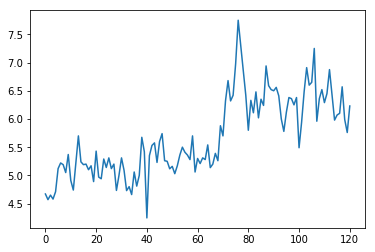

In [5]:
foF2av = mean(data[:,1]) # среднее значение foF2 за данный промежуток 
foF2 = data[:,1]
#foF2 = data[:,1]
#for i in range(0,N-1):
   # foF2[i+1] = data[i+1,1] -data[i,1]
plot(foF2)

In [6]:
# Вейвлет преобразование Морле
Np = 30
WA = np.zeros(Np*N).reshape(Np,N)
for i in range(1,Np):
    for j in range(0,N):
        sum = 0
        for e in range(0,N):
            sum = sum + (foF2[e] - foF2av)*morley((t[e]-b[j])/a[i])
        WA[i,j] = sum/sqrt(a[i])

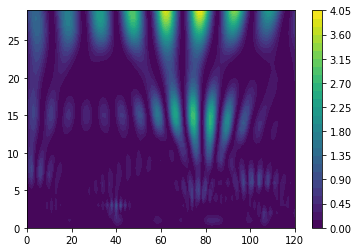

In [7]:
contourf((WA)**2, 35)
colorbar()

In [8]:
W = (WA)**2
Ew = np.zeros(N*2).reshape(N,2)
for j in range(1,N):
    sum = 0
    for i in range(4, 11):
        sum = sum + W[i,j]
        Ew[j,0] = j
        Ew[j,1] = sum
#savetxt('Energy_2008_Tomso(26-30).dat', Ew)

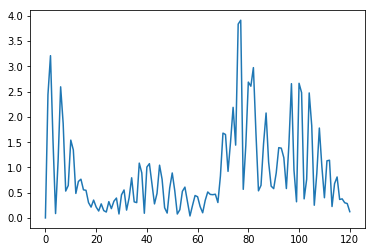

In [9]:
plot(Ew[:,0], Ew[:,1])

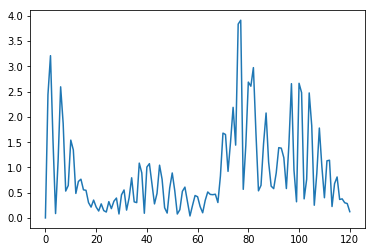

In [10]:
N=len(Ew[:,0])
G=zeros(N)
Gh=zeros(N)
G=Ew[:,1]
day=Ew[:,0]
plot(day,G)

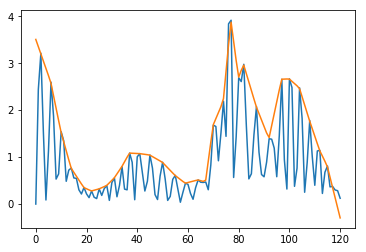

In [11]:
Gh= enveloppe(G)
plot(day,G)
plot(day,Gh)

In [12]:
env = np.zeros(2*N).reshape(N,2)

for i in range(0,N):
    env[i,0] = day[i]
    env[i,1] = Gh[i]
#savetxt('EnergyEnv_2010(4-11)IRK.dat', env)